<a href="https://colab.research.google.com/github/Giridharan-P05/Giridharan-P05/blob/main/Unemployment%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [28]:
df.fillna(method='ffill', inplace=True)

<ipython-input-28-cc469a1f56c1>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [30]:
if 'Date' not in df.columns:
    # Possible alternatives for the column name
    date_alternatives = ['date', 'DATE', 'Date ', ' Date']

    # Iterate through alternatives and check if they exist
    for alt_name in date_alternatives:
        if alt_name in df.columns:
            # Rename the column to 'Date'
            df.rename(columns={alt_name: 'Date'}, inplace=True)
            print(f"Renamed column '{alt_name}' to 'Date'")
            break  # Exit loop if found
    else:
        # If none of the alternatives are found, raise an error
        raise KeyError(f"Column 'Date' or its variations not found in DataFrame. Available columns: {df.columns.tolist()}")

Renamed column ' Date' to 'Date'


In [31]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-31-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


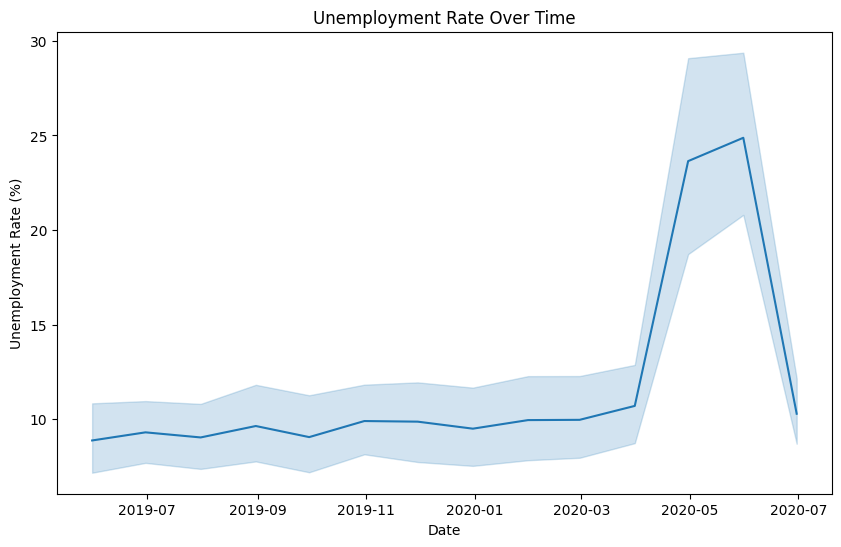

In [33]:
plt.figure(figsize=(10, 6))  # Set figure size
# Check if 'Unemployment_Rate' exists, if not, try ' Estimated Unemployment Rate (%)'
y_col = 'Unemployment_Rate' if 'Unemployment_Rate' in df.columns else ' Estimated Unemployment Rate (%)'
sns.lineplot(x='Date', y=y_col, data=df)  # Use the correct column name
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()